In [1]:
# importing modules
import pandas as pd
import numpy as np


In [2]:
# import modules
# load data
# eda and data handiling
# # label encoding
# feature selection
# split data
# feature scaling
# random forest - confusion matrix acc, classfication report
# acc score
# feature importances

# Logistic Regression

# SVM

# KNN

# Gradient Boosting

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [7]:
df.shape

(10000, 14)

In [9]:
# EDA 
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [18]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [20]:
df.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [22]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

DATA ENCODING

In [25]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [27]:
# encode gender, gergraphy

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns = ['Geography'], drop_first = True)

In [30]:
df

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,False,False
9996,9997,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,False,False
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,False,False
9998,9999,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,1,True,False


In [31]:
#feature selection 
features = ['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts',
            'HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain']
X = df[features]
y = df['Exited']


In [32]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 2)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [41]:
# # label encoding
# feature selection
# split data
# feature scaling
# random forest - confusion matrix acc, classfication report
# acc score
# feature importances

# Logistic Regression

# SVM

# KNN

# Gradient Boosting

In [43]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators =  100, random_state = 2)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print('Confusion Matrix:',cr)
print()
print('Classification Matrix;',cm)
print()
print('Accuracy :',clf.score(X_test,y_test))

Confusion Matrix:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2415
           1       0.74      0.44      0.55       585

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.85      0.86      0.85      3000


Classification Matrix; [[2323   92]
 [ 328  257]]

Accuracy : 0.86


In [45]:
## Logistin Regression Model


In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

In [47]:
cm_lr = confusion_matrix(y_test,lr_pred)
cr_lr = classification_report(y_test,lr_pred)
print('Confusion Matrix:',cr_lr)
print()
print('Classification Matrix;',cm_lr)
print()
print('Accuracy :',lr.score(X_test,y_test))

Confusion Matrix:               precision    recall  f1-score   support

           0       0.83      0.95      0.89      2415
           1       0.49      0.20      0.28       585

    accuracy                           0.80      3000
   macro avg       0.66      0.57      0.59      3000
weighted avg       0.76      0.80      0.77      3000


Classification Matrix; [[2294  121]
 [ 468  117]]

Accuracy : 0.8036666666666666


In [49]:
## Standart Vector Machine

In [55]:
from sklearn import svm

stdvec = svm.SVC()

stdvec.fit(X_train,y_train)

SVC()

In [56]:
svc_pred = stdvec.predict(X_test)

In [57]:
cm_svc= confusion_matrix(y_test,y_pred)
cr_svc = classification_report(y_test,y_pred)
print('Confusion Matrix:',cr_svc)
print()
print('Classification Matrix;',cm_svc)
print()
print('Accuracy :',stdvec.score(X_test,y_test))

Confusion Matrix:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2415
           1       0.74      0.44      0.55       585

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.85      0.86      0.85      3000


Classification Matrix; [[2323   92]
 [ 328  257]]

Accuracy : 0.8553333333333333


In [58]:
 from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [59]:

knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
cm_knn= confusion_matrix(y_test,y_pred)
cr_knn = classification_report(y_test,y_pred)
print('Confusion Matrix:',cr_knn)
print()
print('Classification Matrix;',cm_knn)
print()
print('Accuracy :',knn.score(X_test,y_test))

Confusion Matrix:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2415
           1       0.74      0.44      0.55       585

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.85      0.86      0.85      3000


Classification Matrix; [[2323   92]
 [ 328  257]]

Accuracy : 0.8323333333333334


In [61]:
 from sklearn.ensemble import GradientBoostingClassifier

xgb = GradientBoostingClassifier()

xgb.fit(X_train,y_train)

GradientBoostingClassifier()

In [62]:
xgb.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
cm_xgb= confusion_matrix(y_test,y_pred)
cr_xgb = classification_report(y_test,y_pred)
print('Confusion Matrix:',cr_xgb)
print()
print('Classification Matrix;',cm_xgb)
print()
print('Accuracy :',xgb.score(X_test,y_test))

Confusion Matrix:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2415
           1       0.74      0.44      0.55       585

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.85      0.86      0.85      3000


Classification Matrix; [[2323   92]
 [ 328  257]]

Accuracy : 0.863


In [52]:
# Drawing comparisions
print('Random Forest Accuracy                :',clf.score(X_test,y_test))
print('Logistic Regression Accuracy          :',lr.score(X_test,y_test))
print('Standard Vector Accuracy              :',stdvec.score(X_test,y_test))
print('K Nearest Neighbour Accuracy          :',knn.score(X_test,y_test))
print('XG Booster Accuracy                   :',xgb.score(X_test,y_test))


Random Forest Accuracy                : 0.86
Logistic Regression Accuracy          : 0.8036666666666666
Standard Vector Accuracy              : 0.8553333333333333
K Nearest Neighbour Accuracy          : 0.8323333333333334
XG Booster Accuracy                   : 0.863


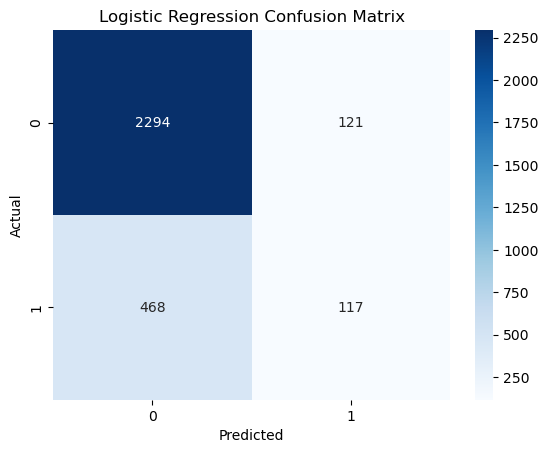

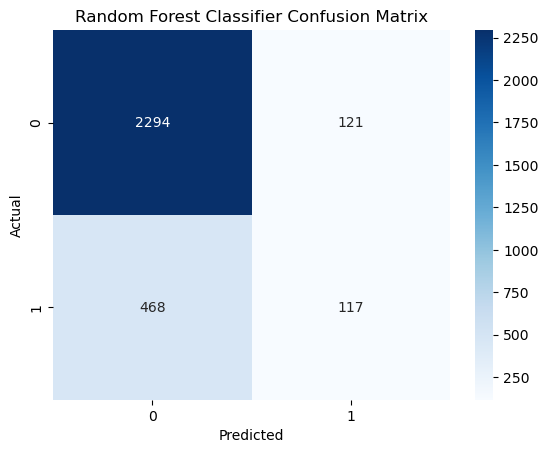

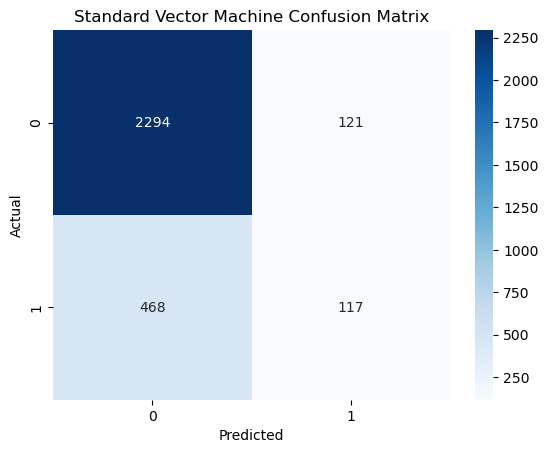

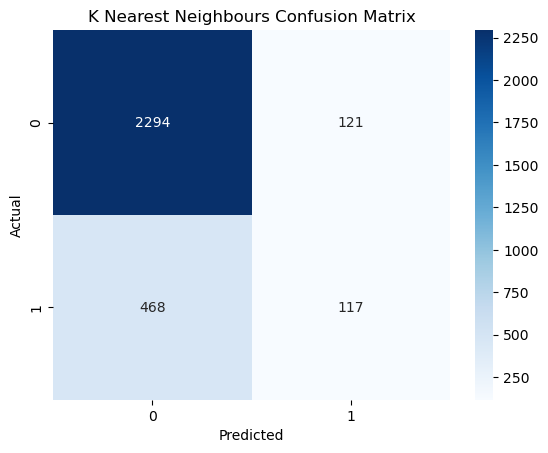

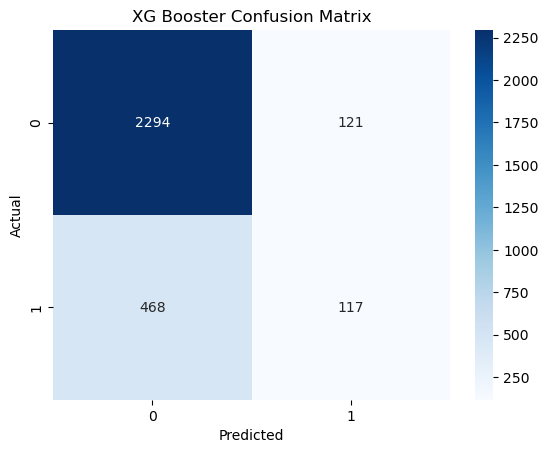

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Confusion Matrix for Random Forest
clf_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Confusion Matrix for Standard Vecotr Machine
stdvec_cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Standard Vector Machine Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Confusion Matrix for K Nearest Neighbour
knn_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title("K Nearest Neighbours Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Confusion Matrix for XG Booster 
lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title("XG Booster Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# conculsion - XG Booster algorithm derives the best accuracy as compared to logistic regression, KNN, RandomForest and sVM